In [1]:
import syntheticModel, Hypercube, SepTensor
import matplotlib.pyplot as plt
import numpy as np
import geology

In [3]:
# make hypercude to describe initial model
x_axis = Hypercube.axis(n=200,
                        o=0.0,
                        d=1)
y_axis = Hypercube.axis(n=200,
                        o=0.0,
                        d=1)
z_axis = Hypercube.axis(n=20,
                        o=0.0,
                        d=1)
hyper = Hypercube.hypercube(axes=[z_axis, y_axis, x_axis])

# make synthetic model builder 
deposit_basement_vp = 2000
basement = {"vp": deposit_basement_vp}
primary = "vp"
geomodel = syntheticModel.geoModel(hyper, 
                                   basement, 
                                   primary,
                                   rgt=True)

# deposit layer
geomodel= geology.deposit(geomodel,
                          prop=deposit_basement_vp,
                          thick=54,
                          interbedThick=3,
                          interbedThickVar=10,
                          interbedPropVar=100,
                          vp_var=0.0)
#squish
geomodel = geology.squish(geomodel,max=25)
geomodel = geology.deposit(geomodel,
                           prop=deposit_basement_vp,
                           thick=1,
                           interbedThick=3,
                           interbedThickVar=10,
                           interbedPropVar=100,
                           vp_var=0.0)
# deposit layer with pinchout
geomodel = geology.deposit(geomodel,
                           prop=deposit_basement_vp,
                           thick=54,
                           interbedThick=3,
                           interbedThickVar=10,
                           interbedPropVar=100,
                           vp_var=0.0,
                           expand=True)

# add a fault 
n_faults = 5
o_fault = 0.1
d_fault = 0.16
for i_fault in np.arange(n_faults):
    x = o_fault + i_fault * d_fault
    y = o_fault + i_fault * d_fault
    geomodel = geology.fault(geomodel,
                           begx=x,
                             begy=y,
                             begz=0.5,
                             angle=10,
                             indicate=True,
                             radiusFreq=0.1,
                             ruptureLength=30,
                             extentInLine=75,
                             extentCrossLine=200,
                             shift=12,
                             radius=2000,
                             indicateF=True,indicateI=True,
                             indicateMark=1)

Text(0.5, 1.0, 'seismic + rgt contours')

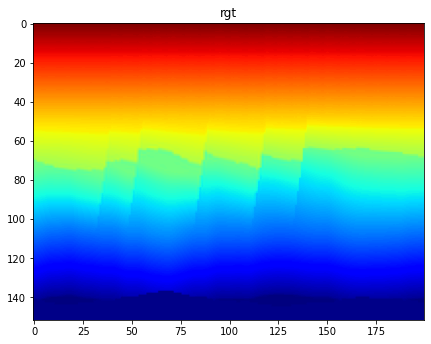

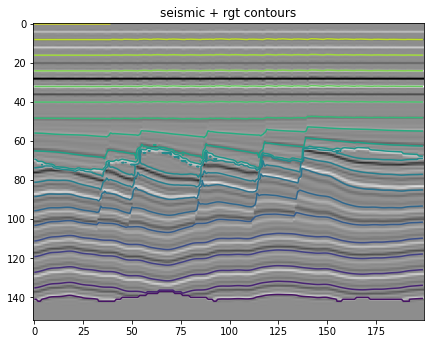

In [4]:
i_slice = 100

plt.figure(figsize=(7,7))
plt.imshow(geomodel.get('rgt').getNdArray()[i_slice].T,
          cmap='jet')
plt.title('rgt')

plt.figure(figsize=(7,7))
vp = geomodel.get('vp').getNdArray()[i_slice]
refl = np.zeros_like(vp)
refl[...,1:] = vp[...,:-1] - vp[...,1:]
plt.imshow(refl.T,
          cmap='gray')
plt.contour(geomodel.get('rgt').getNdArray()[i_slice].T,
           levels=20)
plt.title('seismic + rgt contours')

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(geomodel.get('rgt').getNdArray()[...,80].T,
          cmap='jet',
           vmin=np.amin((geomodel.get('rgt').getNdArray())),
            vmax=np.amax((geomodel.get('rgt').getNdArray()))
          )
plt.colorbar()
print(np.amin(geomodel.get('rgt').getNdArray()[...,14]))
print(np.amax(geomodel.get('rgt').getNdArray()[...,14]))

In [ ]:
plt.plot(geomodel.get('rgt').getNdArray()[i_slice,i_slice])

In [ ]:
geomodel.get('vp').getNdArray().shape